# Time series of change in brightness temperature at single locations. 

This jupyter notebook generates 10-min differential brightness temperature time series based on GOES IR channel data at give specific locations, to check the arrival times of tsunami and atmospheric source. 

If you use this in a scientific paper, we will appreciate a citation to the paper:

Omira, R., Ramalho, R.S., Kim, J., Gonzalez, P.J., Kadri, U., Miranda, J.M., Carrilho, F., Baptista, M.A., (2022) Global Tonga tsunami explained by a fast-moving atmospheric source. *Nature*, doi:[10.1038/s41586-022-04926-4](https://doi.org/10.1038/s41586-022-04926-4).

In [2]:
#Import the GOES package.
import GOES
from netCDF4 import Dataset                # Read / Write NetCDF4 files
import matplotlib.pyplot as plt            # Plotting library
import numpy as np                         # Scientific computing with Python
import cartopy, cartopy.crs as ccrs        # Plot maps
from datetime import datetime, timedelta   # Library to convert julian day to dd-mm-yyyy
import glob
import sys
import pandas as pd 

In [13]:
# Hilo Bay = Longitude 155.0 W , Latitude 19.7° N
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/HiloBay.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G17_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -155.0, 19.7)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()    

2022 01 15 02 50 -2.212310791015625
2022 01 15 03 00 -0.8603515625
2022 01 15 03 10 2.765411376953125
2022 01 15 03 20 -0.368743896484375
2022 01 15 03 30 -0.24578857421875
2022 01 15 03 40 -0.368743896484375
2022 01 15 03 50 -0.24578857421875
2022 01 15 04 00 -0.245819091796875
2022 01 15 04 10 -0.92181396484375
2022 01 15 04 20 0.43017578125
2022 01 15 04 30 0.1229248046875
2022 01 15 04 40 -0.245819091796875
2022 01 15 04 50 0.061431884765625
2022 01 15 05 00 -0.122894287109375
2022 01 15 05 10 -0.245819091796875
2022 01 15 05 20 0.06146240234375
2022 01 15 05 30 -0.245819091796875
2022 01 15 05 40 -0.06146240234375
2022 01 15 05 50 -0.061431884765625
2022 01 15 06 00 -0.184356689453125
2022 01 15 06 10 -0.1229248046875
2022 01 15 06 20 -0.122894287109375
2022 01 15 06 30 -0.184356689453125
2022 01 15 06 40 -5.592254638671875
2022 01 15 06 50 4.670440673828125
2022 01 15 07 00 -1.5977783203125
2022 01 15 07 10 1.474884033203125
2022 01 15 07 20 -2.396697998046875
2022 01 15 07 30 3.

2022 01 16 19 30 0.368743896484375
2022 01 16 19 40 0.36871337890625
2022 01 16 19 50 0.122894287109375
2022 01 16 20 00 0.43017578125
2022 01 16 20 10 0.06146240234375
2022 01 16 20 20 0.245819091796875
2022 01 16 20 30 0.061431884765625
2022 01 16 20 40 0.18438720703125
2022 01 16 20 50 0.184356689453125
2022 01 16 21 00 0.184356689453125
2022 01 16 21 10 0.061431884765625
2022 01 16 21 20 0.06146240234375
2022 01 16 21 30 0.0
2022 01 16 21 40 -0.122894287109375
2022 01 16 21 50 -0.06146240234375
2022 01 16 22 00 0.122894287109375
2022 01 16 22 10 0.06146240234375
2022 01 16 22 20 0.06146240234375
2022 01 16 22 30 -0.06146240234375
2022 01 16 22 40 -0.122894287109375
2022 01 16 22 50 -0.1229248046875
2022 01 16 23 00 -0.184356689453125
2022 01 16 23 10 -0.122894287109375
2022 01 16 23 20 -0.36871337890625
2022 01 16 23 30 -0.245819091796875


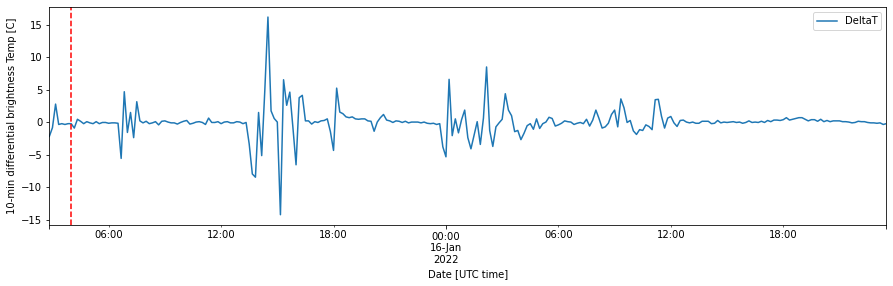

In [32]:
TS = pd.read_csv("TimeSeries_Specific_Locations/HiloBay.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/HiloBay.png')
plt.show()

In [14]:
# Kahului = Longitude 156.4 W , Latitude 20.8° N
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/Kahului.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G17_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -156.4, 20.8)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()      

2022 01 15 02 50 -0.36871337890625
2022 01 15 03 00 -0.553070068359375
2022 01 15 03 10 -0.79888916015625
2022 01 15 03 20 0.0
2022 01 15 03 30 -2.51959228515625
2022 01 15 03 40 -8.787841796875
2022 01 15 03 50 6.26824951171875
2022 01 15 04 00 0.122894287109375
2022 01 15 04 10 -1.351959228515625
2022 01 15 04 20 1.905059814453125
2022 01 15 04 30 -3.933013916015625
2022 01 15 04 40 4.793365478515625
2022 01 15 04 50 -0.06146240234375
2022 01 15 05 00 -1.905059814453125
2022 01 15 05 10 2.08941650390625
2022 01 15 05 20 -0.49163818359375
2022 01 15 05 30 -0.061431884765625
2022 01 15 05 40 0.24578857421875
2022 01 15 05 50 -2.39666748046875
2022 01 15 06 00 -0.92181396484375
2022 01 15 06 10 0.307281494140625
2022 01 15 06 20 1.044708251953125
2022 01 15 06 30 1.96649169921875
2022 01 15 06 40 0.245819091796875
2022 01 15 06 50 0.1229248046875
2022 01 15 07 00 -0.184356689453125
2022 01 15 07 10 -0.245819091796875
2022 01 15 07 20 -0.307281494140625
2022 01 15 07 30 -0.18435668945312

2022 01 16 19 30 0.5531005859375
2022 01 16 19 40 0.553070068359375
2022 01 16 19 50 0.675994873046875
2022 01 16 20 00 0.491607666015625
2022 01 16 20 10 0.5531005859375
2022 01 16 20 20 0.67596435546875
2022 01 16 20 30 0.49163818359375
2022 01 16 20 40 0.36871337890625
2022 01 16 20 50 0.49163818359375
2022 01 16 21 00 0.245819091796875
2022 01 16 21 10 0.061431884765625
2022 01 16 21 20 -0.491607666015625
2022 01 16 21 30 -0.184356689453125
2022 01 16 21 40 0.0
2022 01 16 21 50 -2.335235595703125
2022 01 16 22 00 -0.8603515625
2022 01 16 22 10 -1.53631591796875
2022 01 16 22 20 0.061431884765625
2022 01 16 22 30 -2.150848388671875
2022 01 16 22 40 1.65924072265625
2022 01 16 22 50 -1.29052734375
2022 01 16 23 00 -0.245819091796875
2022 01 16 23 10 -3.134124755859375
2022 01 16 23 20 -0.061431884765625
2022 01 16 23 30 -0.675994873046875


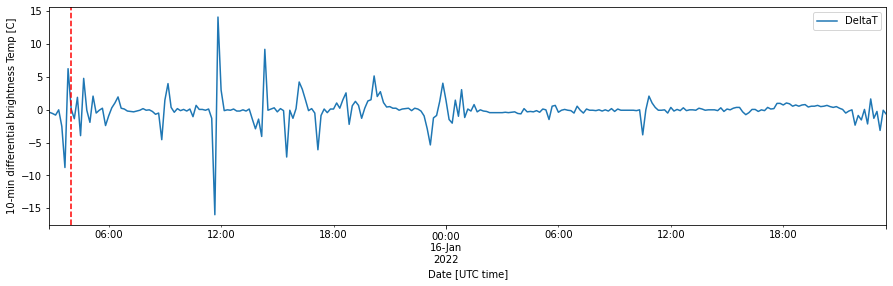

In [31]:
TS = pd.read_csv("TimeSeries_Specific_Locations/Kahului.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/Kahului.png')
plt.show()

In [15]:
# Sand Point (Alaska) = Longitude 160.4 W , Latitude 55.3 N 
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/SandPoint_Alaska.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G17_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -160.4, 55.3)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()      

2022 01 15 02 50 -4.85479736328125
2022 01 15 03 00 0.430145263671875
2022 01 15 03 10 2.826873779296875
2022 01 15 03 20 -3.25701904296875
2022 01 15 03 30 -0.61456298828125
2022 01 15 03 40 1.044708251953125
2022 01 15 03 50 0.368743896484375
2022 01 15 04 00 -0.368743896484375
2022 01 15 04 10 2.08941650390625
2022 01 15 04 20 1.044708251953125
2022 01 15 04 30 1.474884033203125
2022 01 15 04 40 -0.553070068359375
2022 01 15 04 50 -1.044708251953125
2022 01 15 05 00 0.245819091796875
2022 01 15 05 10 2.0279541015625
2022 01 15 05 20 0.553070068359375
2022 01 15 05 30 -0.8603515625
2022 01 15 05 40 -0.491607666015625
2022 01 15 05 50 0.3072509765625
2022 01 15 06 00 0.92181396484375
2022 01 15 06 10 0.8603515625
2022 01 15 06 20 0.7374267578125
2022 01 15 06 30 1.29052734375
2022 01 15 06 40 1.044708251953125
2022 01 15 06 50 0.491607666015625
2022 01 15 07 00 0.368743896484375
2022 01 15 07 10 -1.106170654296875
2022 01 15 07 20 -1.720703125
2022 01 15 07 30 -0.36871337890625
2022 0

2022 01 16 18 50 -2.581024169921875
2022 01 16 19 00 -4.486083984375
2022 01 16 19 10 3.441375732421875
2022 01 16 19 20 0.49163818359375
2022 01 16 19 30 -0.737457275390625
2022 01 16 19 40 -0.79888916015625
2022 01 16 19 50 2.08941650390625
2022 01 16 20 00 -1.22906494140625
2022 01 16 20 10 -2.94976806640625
2022 01 16 20 20 -1.106170654296875
2022 01 16 20 30 0.614532470703125
2022 01 16 20 40 -5.59222412109375
2022 01 16 20 50 7.190032958984375
2022 01 16 21 00 -2.51959228515625
2022 01 16 21 10 2.765411376953125
2022 01 16 21 20 -1.78216552734375
2022 01 16 21 30 -2.39666748046875
2022 01 16 21 40 3.441375732421875
2022 01 16 21 50 2.703948974609375
2022 01 16 22 00 0.245819091796875
2022 01 16 22 10 2.212310791015625
2022 01 16 22 20 -0.184356689453125
2022 01 16 22 30 1.720703125
2022 01 16 22 40 0.36871337890625
2022 01 16 22 50 1.1676025390625
2022 01 16 23 00 4.731903076171875
2022 01 16 23 10 2.0279541015625
2022 01 16 23 20 2.703948974609375
2022 01 16 23 30 -10.8157653808

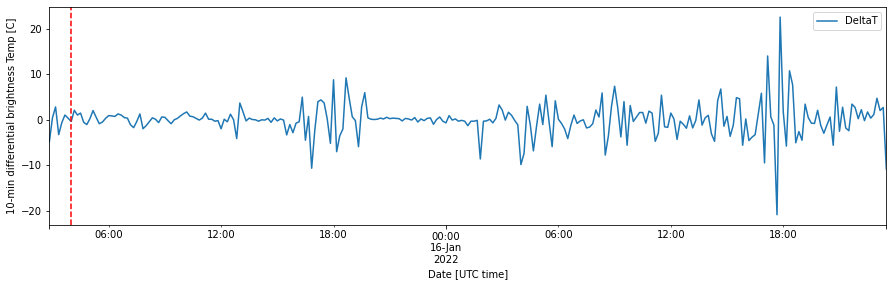

In [30]:
TS = pd.read_csv("TimeSeries_Specific_Locations/SandPoint_Alaska.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/SandPoint_Alaska.png')
plt.show()

In [16]:
# Pacific Islands
################################
# Wake_Isl = Longitude 166.6 W , Latitude 19.3 N 
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/WakeIsland.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G17_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -166.6, 19.3)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()      

2022 01 15 02 50 0.921783447265625
2022 01 15 03 00 0.43017578125
2022 01 15 03 10 0.184356689453125
2022 01 15 03 20 0.06146240234375
2022 01 15 03 30 0.06146240234375
2022 01 15 03 40 0.0
2022 01 15 03 50 0.122894287109375
2022 01 15 04 00 -0.061431884765625
2022 01 15 04 10 0.122894287109375
2022 01 15 04 20 0.0
2022 01 15 04 30 0.06146240234375
2022 01 15 04 40 -0.06146240234375
2022 01 15 04 50 0.0
2022 01 15 05 00 0.06146240234375
2022 01 15 05 10 -0.06146240234375
2022 01 15 05 20 -0.06146240234375
2022 01 15 05 30 0.06146240234375
2022 01 15 05 40 0.0
2022 01 15 05 50 -0.184356689453125
2022 01 15 06 00 0.122894287109375
2022 01 15 06 10 0.06146240234375
2022 01 15 06 20 -0.06146240234375
2022 01 15 06 30 -0.184356689453125
2022 01 15 06 40 0.1229248046875
2022 01 15 06 50 0.061431884765625
2022 01 15 07 00 -0.184356689453125
2022 01 15 07 10 0.06146240234375
2022 01 15 07 20 -0.1229248046875
2022 01 15 07 30 -0.36871337890625
2022 01 15 07 40 0.0
2022 01 15 07 50 -0.8603515625

2022 01 16 20 20 -0.18438720703125
2022 01 16 20 30 0.18438720703125
2022 01 16 20 40 -0.1229248046875
2022 01 16 20 50 0.06146240234375
2022 01 16 21 00 0.122894287109375
2022 01 16 21 10 0.06146240234375
2022 01 16 21 20 -0.06146240234375
2022 01 16 21 30 -0.061431884765625
2022 01 16 21 40 -0.368743896484375
2022 01 16 21 50 0.307281494140625
2022 01 16 22 00 -0.307281494140625
2022 01 16 22 10 0.43017578125
2022 01 16 22 20 0.36871337890625
2022 01 16 22 30 0.06146240234375
2022 01 16 22 40 -0.184356689453125
2022 01 16 22 50 0.06146240234375
2022 01 16 23 00 -0.06146240234375
2022 01 16 23 10 0.06146240234375
2022 01 16 23 20 -0.184356689453125
2022 01 16 23 30 0.3072509765625


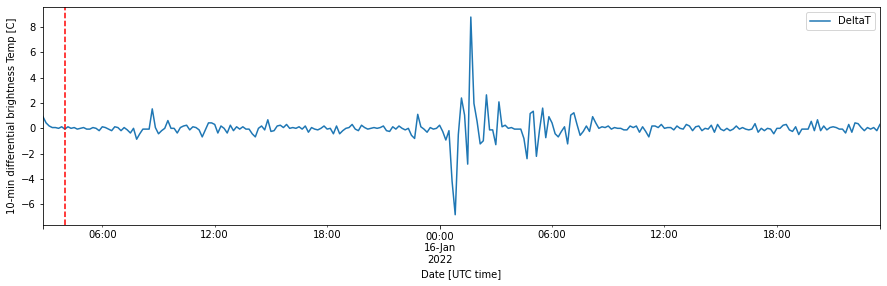

In [29]:
TS = pd.read_csv("TimeSeries_Specific_Locations/WakeIsland.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/WakeIsland.png')
plt.show()

In [17]:
# Pacific Islands
################################
# Sand_Isl (Midway Atoll) Longitude 177.3 W, Latitude 28.2 N
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/SandIsland_Midway.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G17_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -177.3, 28.2)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()      

2022 01 15 02 50 -0.061431884765625
2022 01 15 03 00 -0.06146240234375
2022 01 15 03 10 -0.983245849609375
2022 01 15 03 20 -3.44140625
2022 01 15 03 30 -26.547821044921875
2022 01 15 03 40 -12.41357421875
2022 01 15 03 50 1.843597412109375
2022 01 15 04 00 22.553375244140625
2022 01 15 04 10 11.92193603515625
2022 01 15 04 20 -8.357635498046875
2022 01 15 04 30 -8.480560302734375
2022 01 15 04 40 -5.4693603515625
2022 01 15 04 50 9.89398193359375
2022 01 15 05 00 -14.195709228515625
2022 01 15 05 10 2.8883056640625
2022 01 15 05 20 21.324310302734375
2022 01 15 05 30 -17.698577880859375
2022 01 15 05 40 8.6649169921875
2022 01 15 05 50 0.0
2022 01 15 06 00 -9.83251953125
2022 01 15 06 10 4.731903076171875
2022 01 15 06 20 1.843597412109375
2022 01 15 06 30 1.167633056640625
2022 01 15 06 40 9.40234375
2022 01 15 06 50 -7.620208740234375
2022 01 15 07 00 0.983245849609375
2022 01 15 07 10 -1.782135009765625
2022 01 15 07 20 0.79888916015625
2022 01 15 07 30 2.51959228515625
2022 01 15 

2022 01 16 18 50 2.273773193359375
2022 01 16 19 00 -0.184356689453125
2022 01 16 19 10 -3.3184814453125
2022 01 16 19 20 -1.78216552734375
2022 01 16 19 30 0.8603515625
2022 01 16 19 40 -16.899658203125
2022 01 16 19 50 -1.65924072265625
2022 01 16 20 00 -1.044708251953125
2022 01 16 20 10 -1.905059814453125
2022 01 16 20 20 2.703948974609375
2022 01 16 20 30 3.25701904296875
2022 01 16 20 40 -3.3184814453125
2022 01 16 20 50 5.0391845703125
2022 01 16 21 00 -2.08941650390625
2022 01 16 21 10 -13.826995849609375
2022 01 16 21 20 3.564300537109375
2022 01 16 21 30 2.581024169921875
2022 01 16 21 40 3.81011962890625
2022 01 16 21 50 -4.301727294921875
2022 01 16 22 00 6.636962890625
2022 01 16 22 10 -6.022430419921875
2022 01 16 22 20 -5.100616455078125
2022 01 16 22 30 -5.40789794921875
2022 01 16 22 40 -5.83807373046875
2022 01 16 22 50 0.92181396484375
2022 01 16 23 00 13.5811767578125
2022 01 16 23 10 -3.134124755859375
2022 01 16 23 20 0.675994873046875
2022 01 16 23 30 -0.92181396

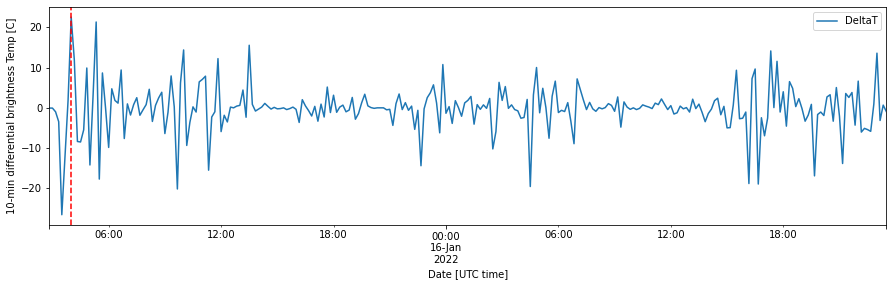

In [28]:
TS = pd.read_csv("TimeSeries_Specific_Locations/SandIsland_Midway.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/SandIsland_Midway.png')
plt.show()

In [18]:
# California Stations
#Name 		Coord			Date/Time (UTC)
#		35°10.1N,120°45.3W	15 Jan. 11:30-12:30; 16 Jan. 08:30-09:30 and 16 Jan. 22:00-23:00 
# San Luis Obispo =  Longitude 120.7 W, Latitude 35.2 N
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/SanLuisObispo_California.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G17_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G17_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -120.7, 35.2)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()                                  

2022 01 15 02 50 -0.79888916015625
2022 01 15 03 00 1.044708251953125
2022 01 15 03 10 -1.474884033203125
2022 01 15 03 20 1.96649169921875
2022 01 15 03 30 6.57550048828125
2022 01 15 03 40 1.966522216796875
2022 01 15 03 50 -1.720703125
2022 01 15 04 00 -1.96649169921875
2022 01 15 04 10 4.916259765625
2022 01 15 04 20 -0.06146240234375
2022 01 15 04 30 1.29052734375
2022 01 15 04 40 3.625732421875
2022 01 15 04 50 2.335235595703125
2022 01 15 05 00 0.675994873046875
2022 01 15 05 10 4.42462158203125
2022 01 15 05 20 0.737457275390625
2022 01 15 05 30 -3.871551513671875
2022 01 15 05 40 -4.3017578125
2022 01 15 05 50 3.87158203125
2022 01 15 06 00 6.391143798828125
2022 01 15 06 10 6.329681396484375
2022 01 15 06 20 3.994476318359375
2022 01 15 06 30 1.905059814453125
2022 01 15 06 40 0.491607666015625
2022 01 15 06 50 -0.184356689453125
2022 01 15 07 00 3.25701904296875
2022 01 15 07 10 -7.8045654296875
2022 01 15 07 20 -3.37994384765625
2022 01 15 07 30 0.614532470703125
2022 01 15

2022 01 16 18 50 1.413421630859375
2022 01 16 19 00 -2.212310791015625
2022 01 16 19 10 1.720672607421875
2022 01 16 19 20 -0.36871337890625
2022 01 16 19 30 4.731903076171875
2022 01 16 19 40 -6.14532470703125
2022 01 16 19 50 -2.15087890625
2022 01 16 20 00 -0.860321044921875
2022 01 16 20 10 -0.368743896484375
2022 01 16 20 20 -0.3072509765625
2022 01 16 20 30 0.3072509765625
2022 01 16 20 40 -0.43017578125
2022 01 16 20 50 0.184356689453125
2022 01 16 21 00 3.134124755859375
2022 01 16 21 10 3.625762939453125
2022 01 16 21 20 -0.49163818359375
2022 01 16 21 30 7.43585205078125
2022 01 16 21 40 5.83807373046875
2022 01 16 21 50 -3.072662353515625
2022 01 16 22 00 -2.765411376953125
2022 01 16 22 10 -5.40789794921875
2022 01 16 22 20 -0.79888916015625
2022 01 16 22 30 -1.29052734375
2022 01 16 22 40 -3.933013916015625
2022 01 16 22 50 4.363189697265625
2022 01 16 23 00 -4.97772216796875
2022 01 16 23 10 1.8436279296875
2022 01 16 23 20 0.860321044921875
2022 01 16 23 30 2.33523559570

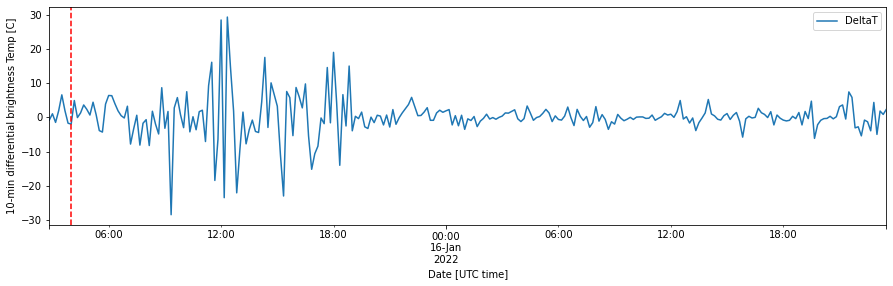

In [27]:
TS = pd.read_csv("TimeSeries_Specific_Locations/SanLuisObispo_California.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/SanLuisObispo_California.png')
plt.show()

In [19]:
# Caribbean Stations
# Name 		Coord			Date/Time (UTC)
# Lameshur Bay	18°19.1N,64°43.5W	15 Jan. 15:18-16:18; 16 Jan. 04:00-05:00 and 17 Jan. 02:30-03:30
# Lameshur Bay = Longitude 64.7 W, Latitude 18.3 N  
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/LameshurBay_VirginIslands.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G16_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G16_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G16_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -64.7, 18.3)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()      

2022 01 15 02 50 0.122894287109375
2022 01 15 03 00 0.06146240234375
2022 01 15 03 10 -0.06146240234375
2022 01 15 03 20 -0.184356689453125
2022 01 15 03 30 0.184356689453125
2022 01 15 03 40 0.06146240234375
2022 01 15 03 50 -0.06146240234375
2022 01 15 04 00 -0.491607666015625
2022 01 15 04 10 -0.184356689453125
2022 01 15 04 20 0.184356689453125
2022 01 15 04 30 0.3072509765625
2022 01 15 04 40 -0.79888916015625
2022 01 15 04 50 0.245819091796875
2022 01 15 05 00 -0.1229248046875
2022 01 15 05 10 -0.79888916015625
2022 01 15 05 20 -0.122894287109375
2022 01 15 05 30 0.614532470703125
2022 01 15 05 40 1.351959228515625
2022 01 15 05 50 0.06146240234375
2022 01 15 06 00 -1.96649169921875
2022 01 15 06 10 -2.703948974609375
2022 01 15 06 20 -3.44140625
2022 01 15 06 30 -4.301727294921875
2022 01 15 06 40 2.335235595703125
2022 01 15 06 50 6.0838623046875
2022 01 15 07 00 3.44140625
2022 01 15 07 10 0.491607666015625
2022 01 15 07 20 0.1229248046875
2022 01 15 07 30 0.06146240234375
202

2022 01 16 20 30 -1.597808837890625
2022 01 16 20 40 2.0279541015625
2022 01 16 20 50 -1.65924072265625
2022 01 16 21 00 1.905059814453125
2022 01 16 21 10 0.5531005859375
2022 01 16 21 20 0.0
2022 01 16 21 30 -0.368743896484375
2022 01 16 21 40 -1.10614013671875
2022 01 16 21 50 1.044708251953125
2022 01 16 22 00 -0.8603515625
2022 01 16 22 10 -6.391143798828125
2022 01 16 22 20 2.51959228515625
2022 01 16 22 30 -4.3017578125
2022 01 16 22 40 -1.474853515625
2022 01 16 22 50 8.2347412109375
2022 01 16 23 00 1.843597412109375
2022 01 16 23 10 -0.36871337890625
2022 01 16 23 20 0.3072509765625
2022 01 16 23 30 -3.441375732421875


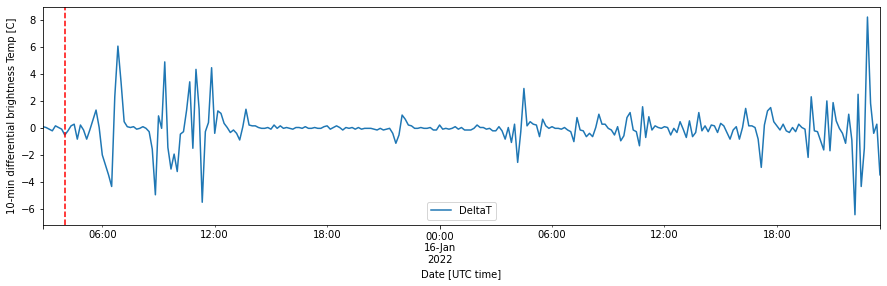

In [26]:
TS = pd.read_csv("TimeSeries_Specific_Locations/LameshurBay_VirginIslands.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/LameshurBay_VirginIslands.png')
plt.show()

In [20]:
# Caribbean Stations
# Name 		Coord			Date/Time (UTC)
# Charlotte	18°20.1N,64°55.2W	15 Jan. 15:18-16:18; 16 Jan. 04:00-05:00 and 17 Jan. 02:30-03:30
# Charlotte = Longitude 64.9 W, Latitude 18.3 N  
orig_stdout = sys.stdout
f = open('TimeSeries_Specific_Locations/Charlotte_VirginIslands.txt', 'w')
sys.stdout = f

files=glob.glob("OR_ABI-L2-CMIPF-M6C13_G16_s*")
for i in range(len(files)-1):
    fechahora1=files[i+1][27:39]
    fechahora2=files[i][27:39]

    # Open the GOES-16 image (Read files)
    file1 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G16_s"+fechahora1+".nc")
    file2 = GOES.open_dataset("OR_ABI-L2-CMIPF-M6C13_G16_s"+fechahora2+".nc")

    #Gets image with the coordinates of center of their pixels.
    CMI1, LonCen1, LatCen1 = file1.image('CMI', lonlat='center')
    CMI2, LonCen2, LatCen2 = file2.image('CMI', lonlat='center')
    
    #Looks for the pixel of a specific coordinate.
    x, y = GOES.find_pixel_of_coordinate(LonCen1, LatCen1, -64.9, 18.3)
    
    #Prints value of pixel
    print(files[i][27:31], files[i][31:33], files[i][33:35], files[i][35:37], files[i][37:39], (CMI1.data[y,x]-273.15) - (CMI2.data[y,x]-273.15))
    
sys.stdout = orig_stdout
f.close()      

2022 01 15 02 50 0.0
2022 01 15 03 00 -0.061431884765625
2022 01 15 03 10 0.0
2022 01 15 03 20 -0.1229248046875
2022 01 15 03 30 0.1229248046875
2022 01 15 03 40 -0.06146240234375
2022 01 15 03 50 0.06146240234375
2022 01 15 04 00 -0.184356689453125
2022 01 15 04 10 -0.06146240234375
2022 01 15 04 20 -0.1229248046875
2022 01 15 04 30 0.0
2022 01 15 04 40 0.06146240234375
2022 01 15 04 50 -0.06146240234375
2022 01 15 05 00 0.0
2022 01 15 05 10 0.06146240234375
2022 01 15 05 20 0.184356689453125
2022 01 15 05 30 0.0
2022 01 15 05 40 -0.061431884765625
2022 01 15 05 50 0.122894287109375
2022 01 15 06 00 0.06146240234375
2022 01 15 06 10 -0.06146240234375
2022 01 15 06 20 -0.06146240234375
2022 01 15 06 30 0.1229248046875
2022 01 15 06 40 -0.06146240234375
2022 01 15 06 50 0.06146240234375
2022 01 15 07 00 0.061431884765625
2022 01 15 07 10 0.0
2022 01 15 07 20 0.0
2022 01 15 07 30 0.06146240234375
2022 01 15 07 40 -0.06146240234375
2022 01 15 07 50 0.06146240234375
2022 01 15 08 00 -1.597

2022 01 16 21 10 0.122894287109375
2022 01 16 21 20 -0.245819091796875
2022 01 16 21 30 -0.184356689453125
2022 01 16 21 40 -0.43017578125
2022 01 16 21 50 -1.5977783203125
2022 01 16 22 00 1.782135009765625
2022 01 16 22 10 -0.3072509765625
2022 01 16 22 20 -0.245819091796875
2022 01 16 22 30 -1.351959228515625
2022 01 16 22 40 0.3072509765625
2022 01 16 22 50 -3.68719482421875
2022 01 16 23 00 3.37994384765625
2022 01 16 23 10 -1.843597412109375
2022 01 16 23 20 -5.223541259765625
2022 01 16 23 30 2.82684326171875


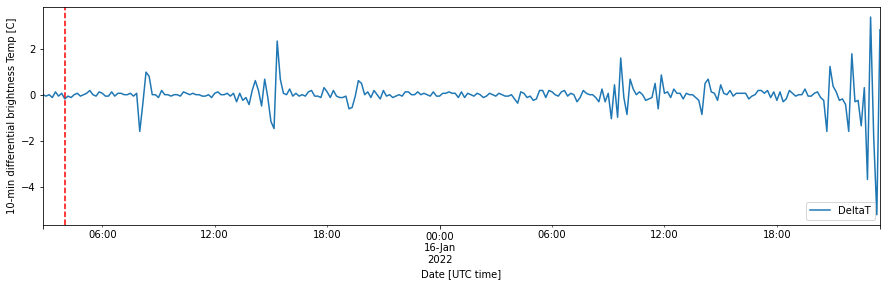

In [25]:
TS = pd.read_csv("TimeSeries_Specific_Locations/Charlotte_VirginIslands.txt", 
                 header=None, sep=' ',
                 names=['year', 'month', 'day', 'hour', 'minute', 'DeltaT'])
TS['date'] = pd.to_datetime(TS[['year', 'month', 'day', 'hour', 'minute']])
TS.head()
ax = TS.plot(x="date", y="DeltaT", figsize=(15,4));
ax.axvline("2022-01-15 04:00", color="red", linestyle="dashed")
ax.set_xlabel("Date [UTC time]")
ax.set_ylabel("10-min differential brightness Temp [C]")
ax.figure.savefig('TimeSeries_Specific_Locations/Charlotte_VirginIslands.png')
plt.show()